In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

data = pd.read_csv("drive/MyDrive/project_csv_data/serial_20230913_184043.csv")
data.head()

,timestamps,ax,ay,az,mag,time
0,33173,-1.10,0.21,-0.19,11.33,3268
1,33183,-1.12,0.18,-0.16,11.50,3269
2,33193,-1.13,0.16,-0.03,11.47,3270
3,33203,-1.12,0.19,-0.04,11.42,3271
4,33213,-1.07,0.21,-0.08,10.96,3272


<Axes: >

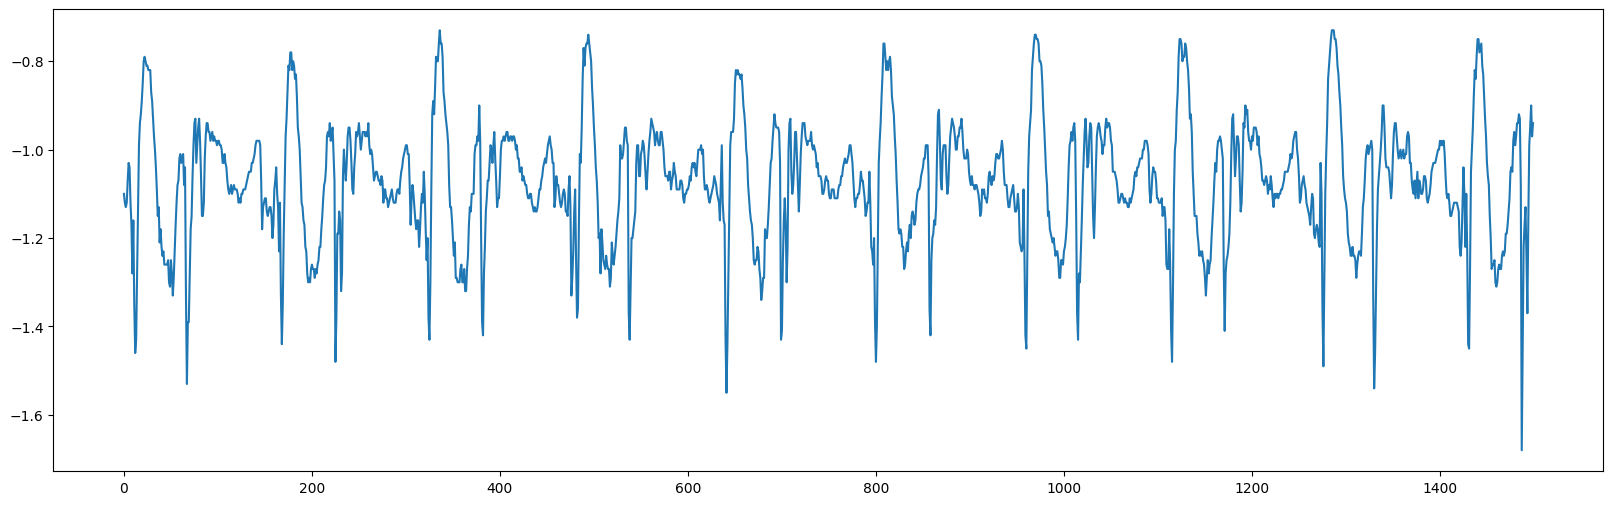

In [ ]:
data[:1500].ax.plot(figsize=(20, 6))

<Axes: >

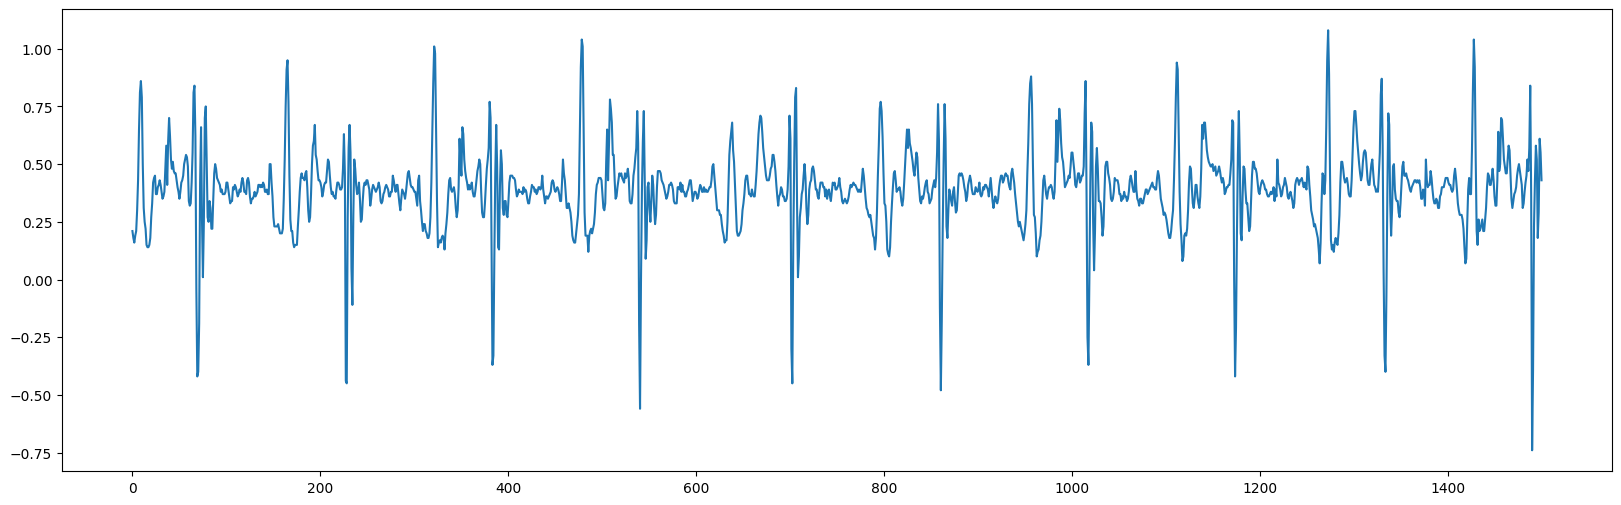

In [ ]:
data[:1500].ay.plot(figsize=(20, 6))

<Axes: >

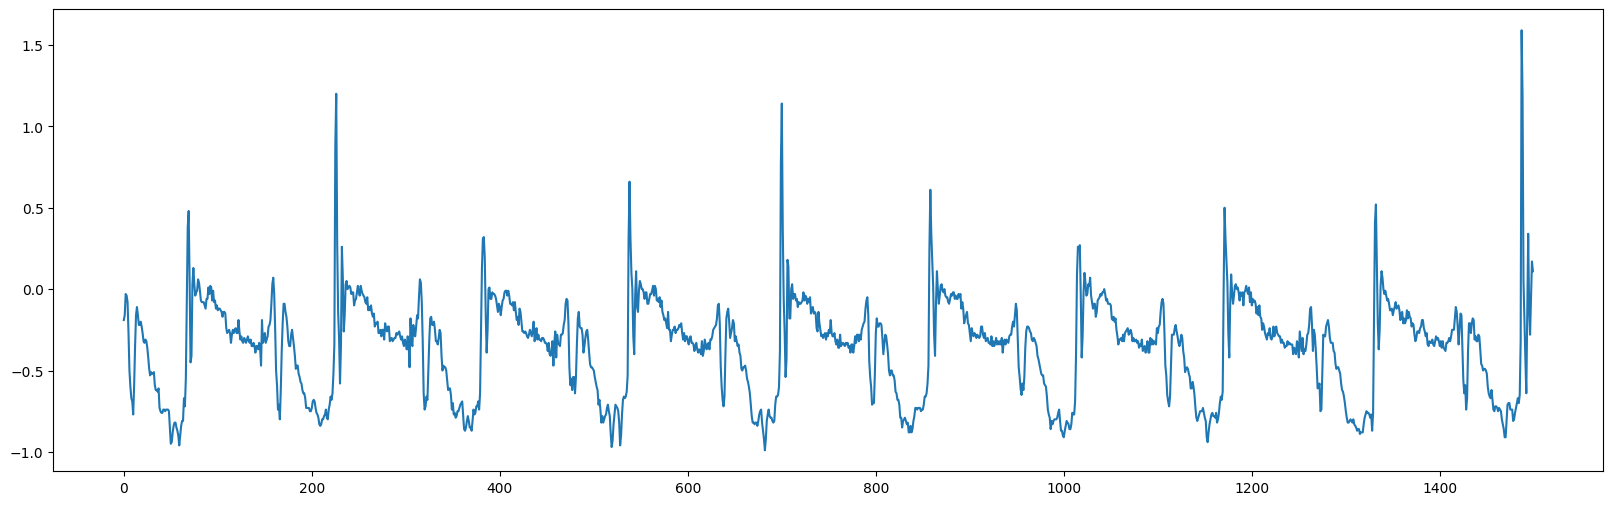

In [ ]:
data[:1500].az.plot(figsize=(20, 6))

### Low-pass filtering

In [ ]:
from scipy.signal import butter, filtfilt

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Choose cutoff frequency and filter the magnitude data
cutoff_frequency = 4.0  # Adjust as needed
fs = 90.0  # Sample rate (assuming timestamps are in milliseconds)
data['filtered_ax'] = butter_lowpass_filter(data['ax'], cutoff_frequency, fs)
data['filtered_ay'] = butter_lowpass_filter(data['ay'], cutoff_frequency, fs)
data['filtered_az'] = butter_lowpass_filter(data['az'], cutoff_frequency, fs)

<Axes: >

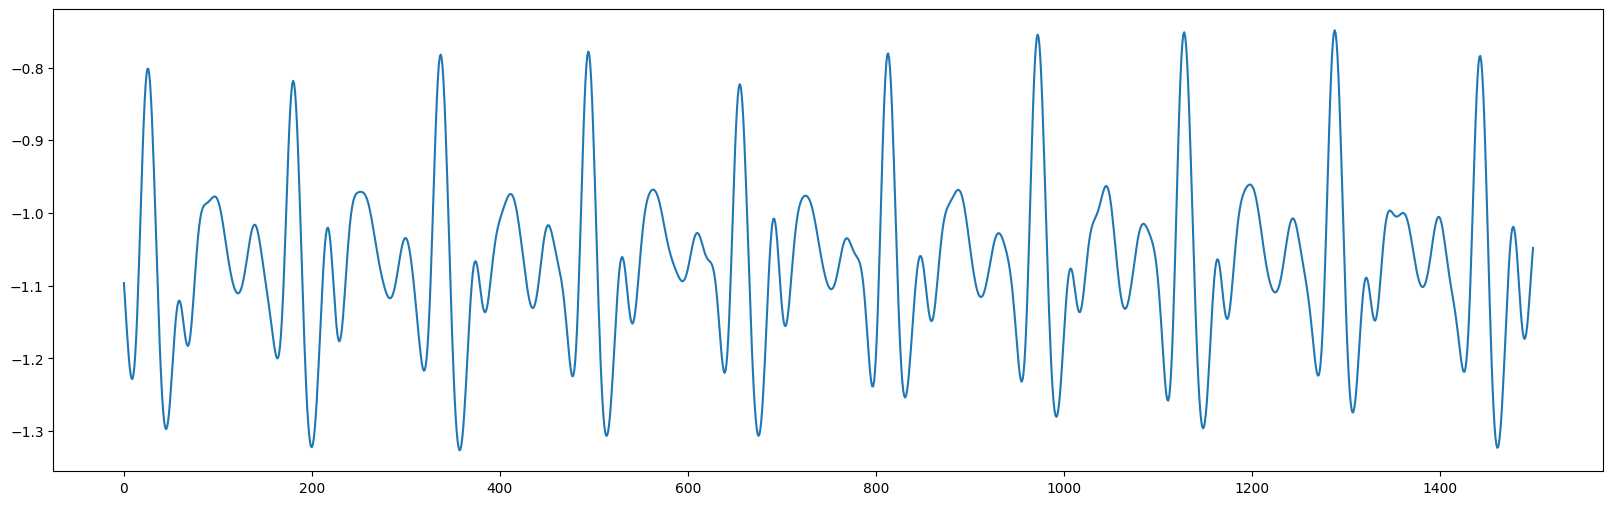

In [ ]:
data.filtered_ax[:1500].plot(figsize=(20, 6))

<Axes: >

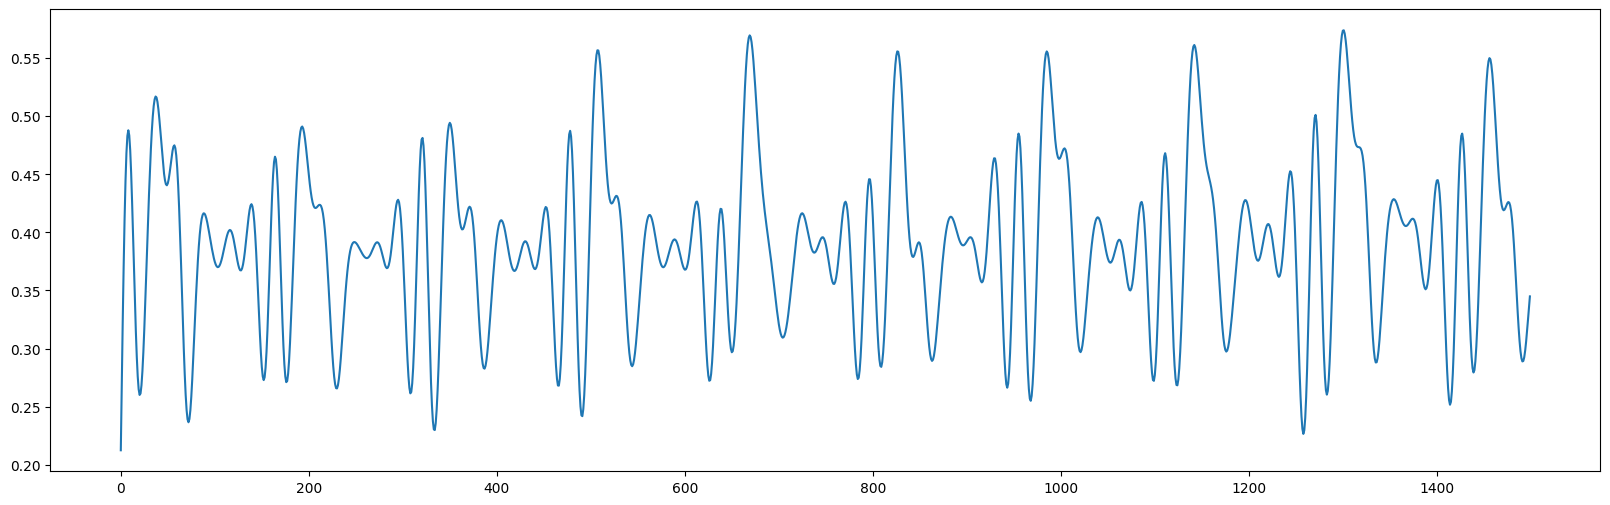

In [ ]:
data.filtered_ay[:1500].plot(figsize=(20, 6))

<Axes: >

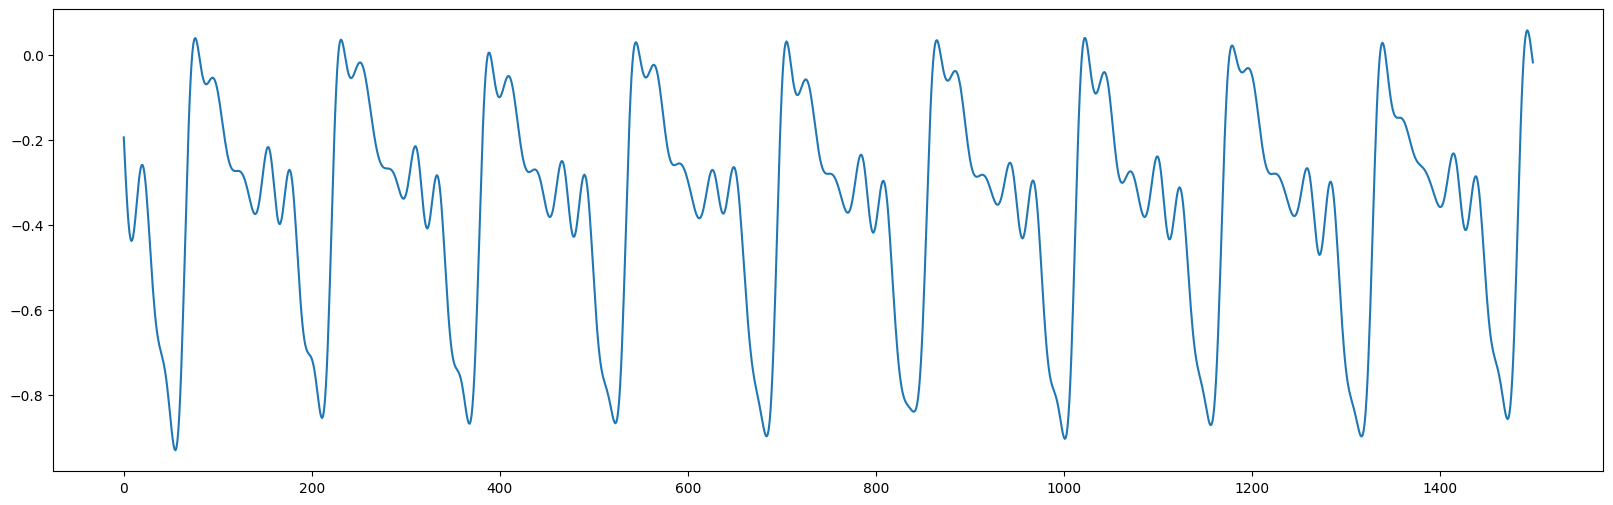

In [ ]:
data.filtered_az[:1500].plot(figsize=(20, 6))

In [ ]:
data

,timestamps,ax,ay,az,mag,time,filtered_ax,filtered_ay,filtered_az
0,33173,-1.10,0.21,-0.19,11.33,3268,-1.096540,0.212374,-0.193856
1,33183,-1.12,0.18,-0.16,11.50,3269,-1.117644,0.268075,-0.241315
2,33193,-1.13,0.16,-0.03,11.47,3270,-1.138724,0.321049,-0.286709
3,33203,-1.12,0.19,-0.04,11.42,3271,-1.159204,0.369215,-0.328359
4,33213,-1.07,0.21,-0.08,10.96,3272,-1.178432,0.410751,-0.364751
...,...,...,...,...,...,...,...,...,...
11723,150403,-1.40,0.24,-0.76,16.11,14991,-1.117168,0.262539,-0.068327
11724,150413,-1.52,0.68,0.19,16.79,14992,-1.077832,0.303879,-0.077205
11725,150423,-0.98,0.58,0.27,11.69,14993,-1.030290,0.352180,-0.099136
11726,150433,-0.89,0.25,-0.32,9.76,14994,-0.976472,0.405496,-0.131497


In [ ]:
import numpy as np

# Constants
sampling_rate = 100.0  # Change this to the actual sampling rate in Hz

# Initialize variables
x_displacement = 0.0
y_displacement = 0.0
z_displacement = 0.0

# Lists to store the calculated displacements
x_displacements = [0.0]
y_displacements = [0.0]
z_displacements = [0.0]

x_velocity = [0.0]
y_velocity = [0.0]
z_velocity = [0.0]

# Iterate through the data
for i in range(1, len(data)):
    dt = (data["timestamps"][i] - data["timestamps"][i - 1]) / 1000.0  # Convert ms to seconds
    ax = data["filtered_ax"][i]
    ay = data["filtered_ay"][i]
    az = data["filtered_az"][i]

    # Integrate acceleration to get velocity
    vx = ax * dt
    vy = ay * dt
    vz = az * dt

    # Integrate velocity to get displacement
    x_displacement += vx * dt
    y_displacement += vy * dt
    z_displacement += vz * dt

    x_velocity.append(vx)
    y_velocity.append(vy)
    z_velocity.append(vz)

    # Append the calculated displacements to the lists
    x_displacements.append(x_displacement)
    y_displacements.append(y_displacement)
    z_displacements.append(z_displacement)

# Add the calculated displacements to the DataFrame
data['x_displacement'] = x_displacements
data['y_displacement'] = y_displacements
data['z_displacement'] = z_displacements

data['x_velocity'] = x_velocity
data['y_velocity'] = y_velocity
data['z_velocity'] = z_velocity

In [ ]:
data

,timestamps,ax,ay,az,mag,time,filtered_ax,filtered_ay,filtered_az,x_displacement,y_displacement,z_displacement,x_velocity,y_velocity,z_velocity
0,33173,-1.10,0.21,-0.19,11.33,3268,-1.096540,0.212374,-0.193856,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,33183,-1.12,0.18,-0.16,11.50,3269,-1.117644,0.268075,-0.241315,-0.000112,0.000027,-0.000024,-0.011176,0.002681,-0.002413
2,33193,-1.13,0.16,-0.03,11.47,3270,-1.138724,0.321049,-0.286709,-0.000226,0.000059,-0.000053,-0.011387,0.003210,-0.002867
3,33203,-1.12,0.19,-0.04,11.42,3271,-1.159204,0.369215,-0.328359,-0.000342,0.000096,-0.000086,-0.011592,0.003692,-0.003284
4,33213,-1.07,0.21,-0.08,10.96,3272,-1.178432,0.410751,-0.364751,-0.000459,0.000137,-0.000122,-0.011784,0.004108,-0.003648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11723,150403,-1.40,0.24,-0.76,16.11,14991,-1.117168,0.262539,-0.068327,-1.248667,0.451884,-0.419356,-0.011172,0.002625,-0.000683
11724,150413,-1.52,0.68,0.19,16.79,14992,-1.077832,0.303879,-0.077205,-1.248775,0.451914,-0.419364,-0.010778,0.003039,-0.000772
11725,150423,-0.98,0.58,0.27,11.69,14993,-1.030290,0.352180,-0.099136,-1.248878,0.451949,-0.419374,-0.010303,0.003522,-0.000991
11726,150433,-0.89,0.25,-0.32,9.76,14994,-0.976472,0.405496,-0.131497,-1.248976,0.451990,-0.419387,-0.009765,0.004055,-0.001315


<Axes: >

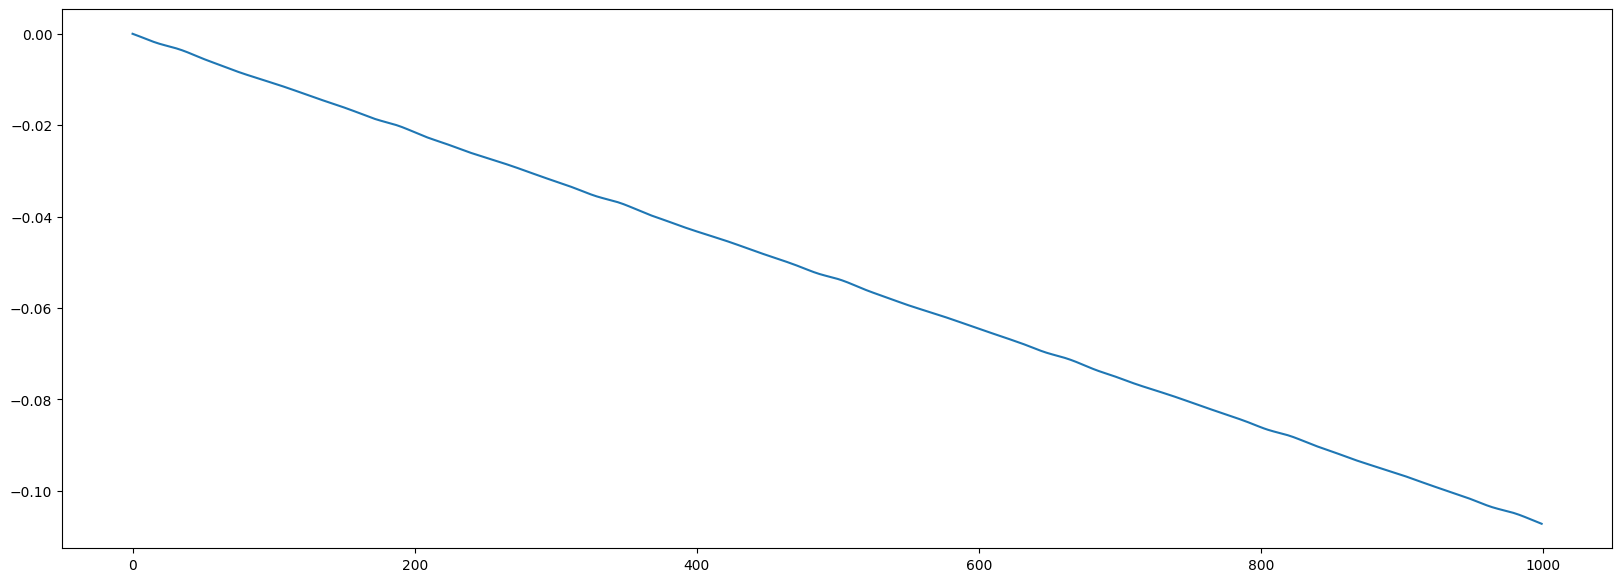

In [ ]:
data['x_displacement'][:1000].plot(figsize=(20,7))

<Axes: >

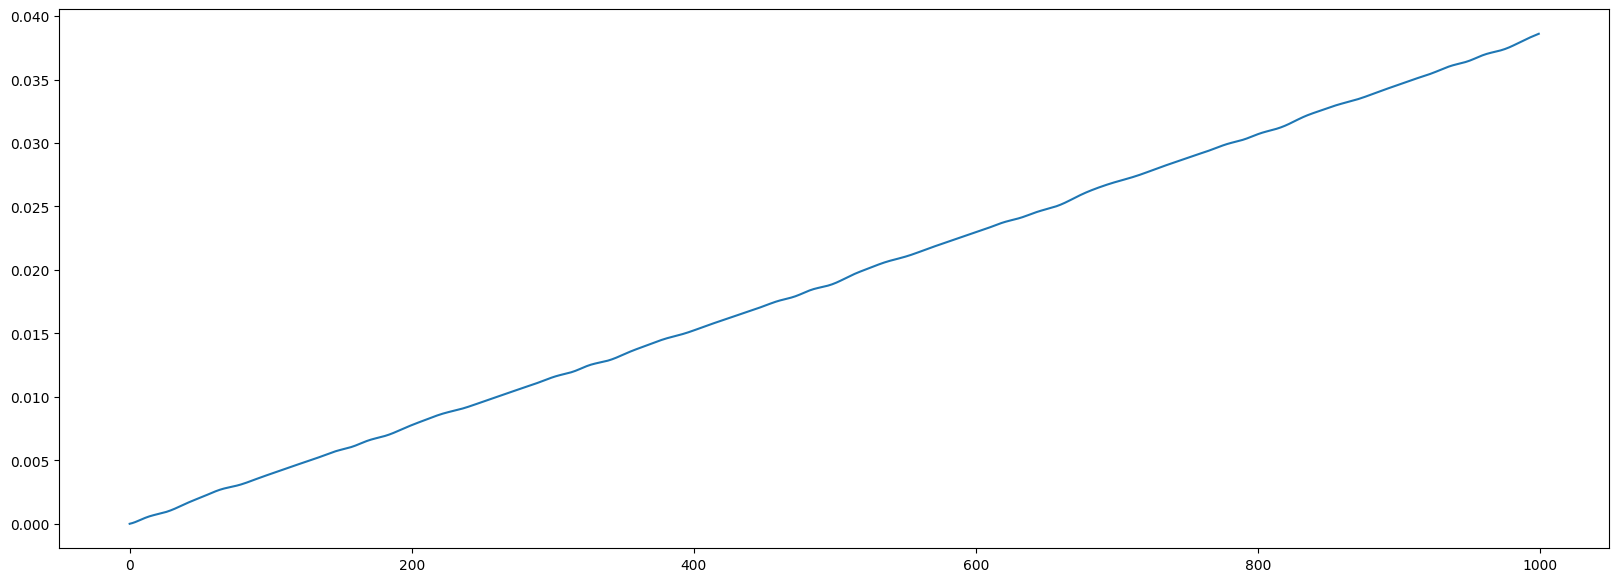

In [ ]:
data['y_displacement'][:1000].plot(figsize=(20,7))

<Axes: >

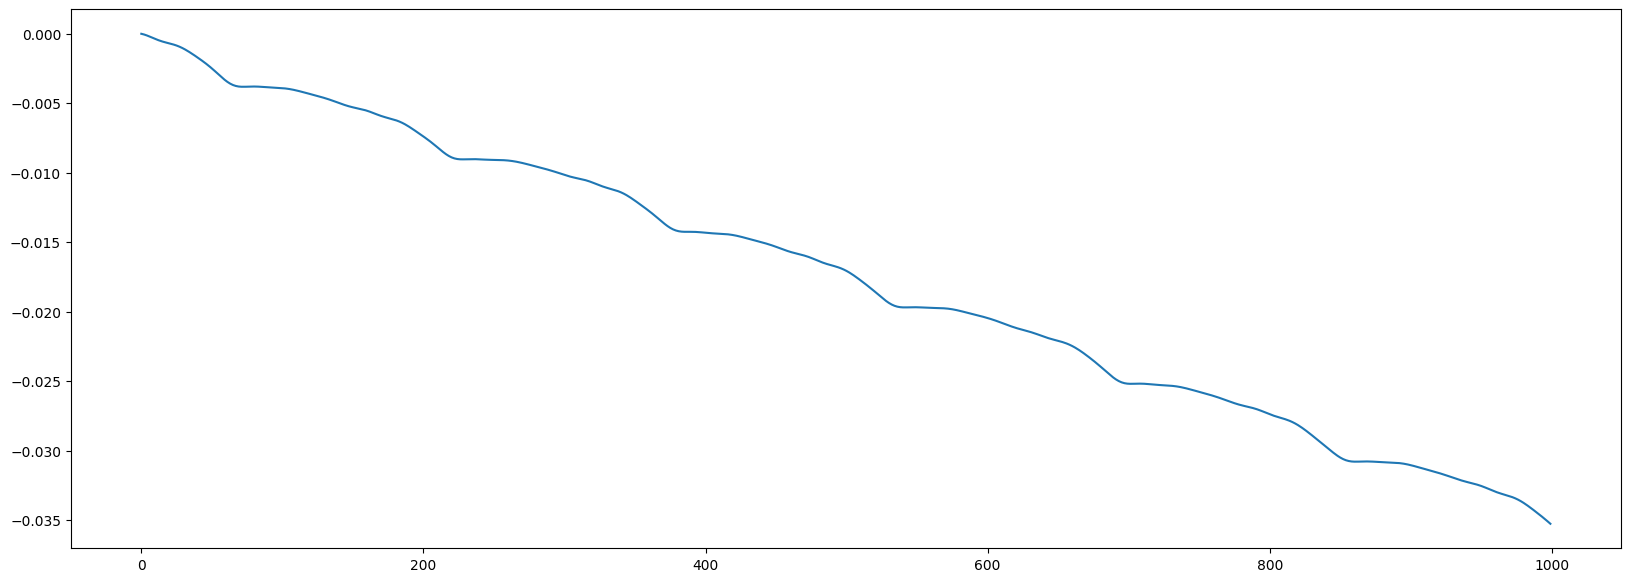

In [ ]:
data['z_displacement'][:1000].plot(figsize=(20,7))

<Axes: >

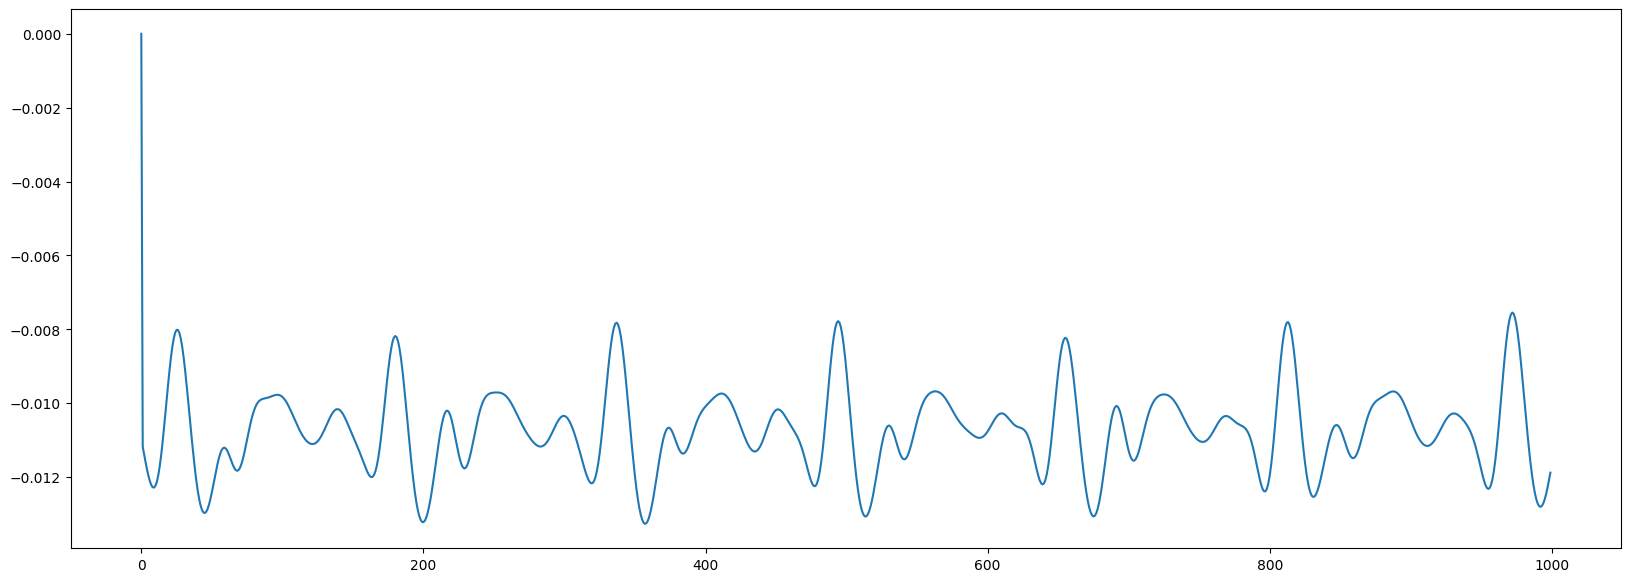

In [ ]:
data['x_velocity'][:1000].plot(figsize=(20,7))

<Axes: >

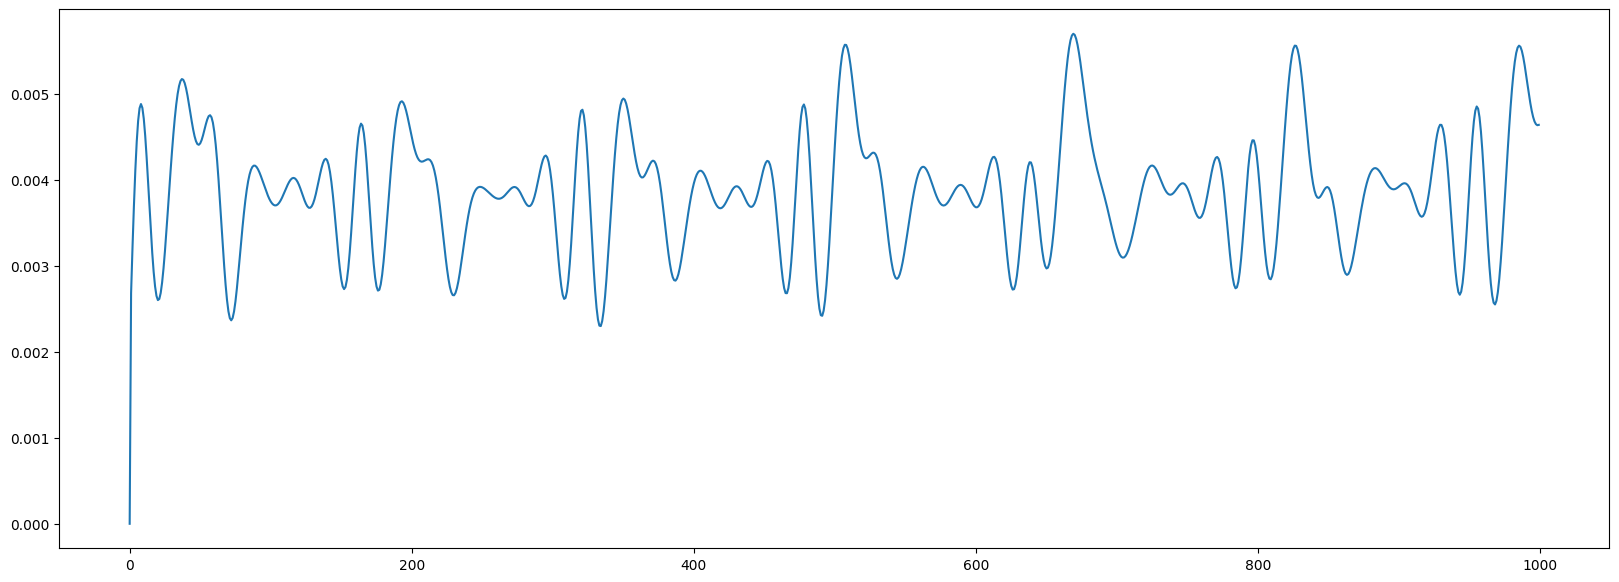

In [ ]:
data['y_velocity'][:1000].plot(figsize=(20,7))

<Axes: >

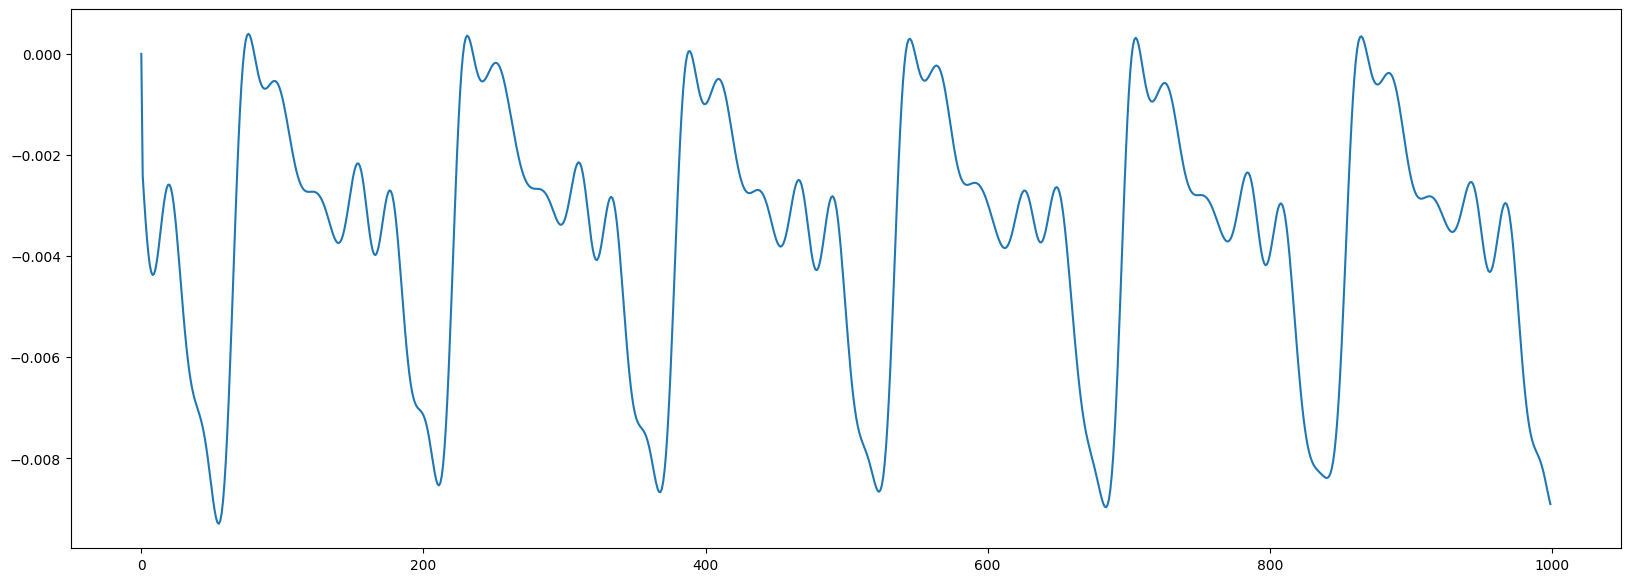

In [ ]:
data['z_velocity'][:1000].plot(figsize=(20,7))

In [ ]:


slope, intercept = np.polyfit(data['x_displacement'], data['y_displacement'], 1)

# Detrend the data
detrended_y_displacement = data['y_displacement'] - (slope * data['x_displacement'] + intercept)


# window_size = 80  # Adjust the window size as needed
# detrended_z_displacement = data['z_displacement'] - data['z_displacement'].rolling(window=window_size).mean()

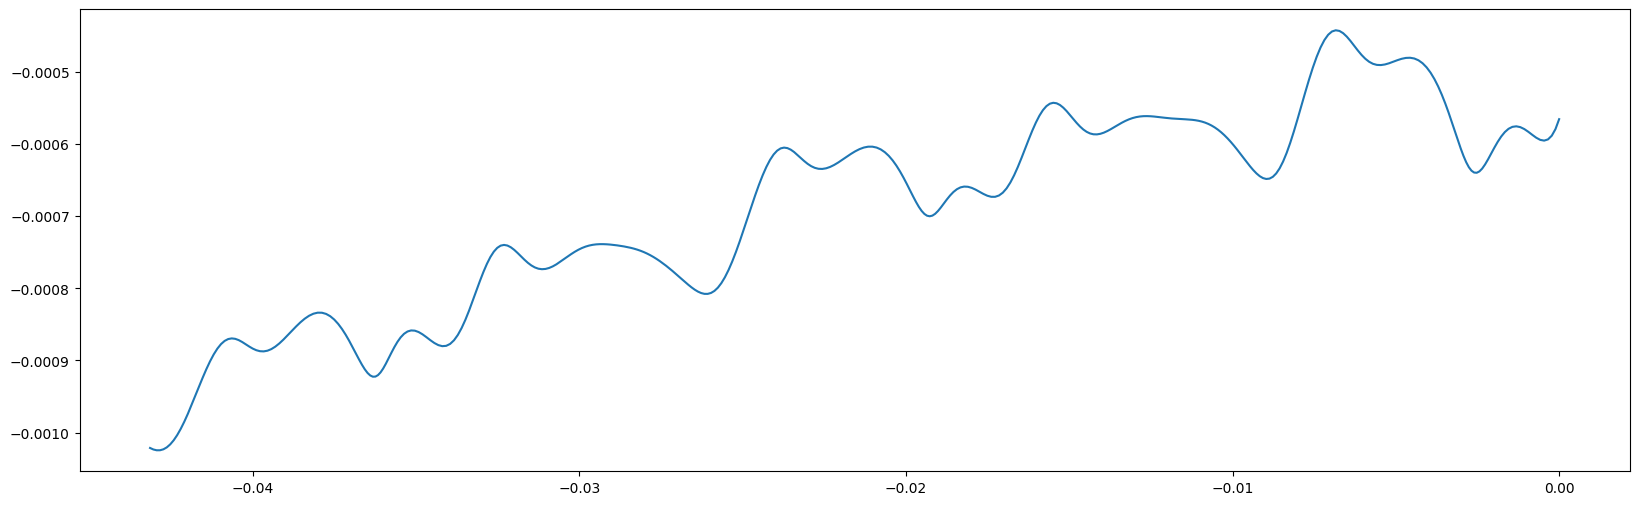

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 6))

plt.plot(data['x_displacement'][:400], detrended_y_displacement[:400])